[0, 0.2626785107312739, 0.2626785107312739, 0.5253570214625478]


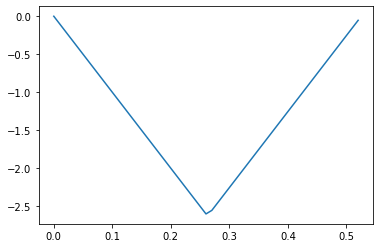

In [29]:
import pybullet as p
import time
import pybullet_data
import math
import numpy as np
import matplotlib.pyplot as plt

Vmax = 10
Amax = 10

def getTrajectoryTrap(A, B):
    t0 = 0
    t1 = np.abs(Vmax / Amax)
    t2 = np.abs(1 / 2 * t1 - 1 / 2 * Vmax / Amax + (B - A) / Vmax)
    v = Vmax
    if t1 > t2:
        v = np.sqrt(Amax * np.abs(B - A))
        t12 = np.abs((B - A) / v)
        t1 = t12
        t2 = t12
    tf = np.abs(v / Amax + t2)
    return [t0, t1, t2, tf]


def vitesse(t, ts):
    t0 = ts[0]
    t1 = ts[1]
    t2 = ts[2]
    tf = ts[3]


    if t < abs(t1):
        res = t * Amax
    elif t < abs(t2):
        res = Vmax
    elif t > abs(tf):
        res = 0
    elif t1 == t2:
        res = - (t - t2) * Amax + np.sqrt(Amax * np.abs(B - A))
    else:
        res = - (t - t2) * Amax + Vmax

    if B - A < 0:
        return -res
    return res

"""
def getTrajectoryTrap(A, B):
    t0 = 0
    t1 = Vmax / Amax
    t2 = 1 / 2 * t1 - 1 / 2 * Vmax / Amax + math.sqrt((B[1] - A[1])**2 + (B[0] - A[0])**2) / Vmax
    tf = Vmax / Amax + t2
    return [t0, t1, t2, tf]


def vitesse(t, ts):
    t0 = ts[0]
    t1 = ts[1]
    t2 = ts[2]
    tf = ts[3]

    if t < t1:
        return t * Amax
    if t < t2:
        return Vmax
    return - (t - t2) * Amax + Vmax
"""

xs = []
ys = []
A = -1.4
B = -2.09

ts = getTrajectoryTrap(A, B)
print(ts)

for t in np.arange(ts[0], ts[-1], 0.01):
    xs.append(t)
    ys.append(vitesse(t, ts))
plt.figure()
plt.plot(xs, ys)
plt.show()

[0, 1.6666666666666667, 1.0, 2.666666666666667]


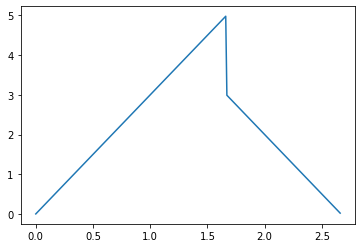

In [12]:

def getTrajectoryTrap(A, B):
    t0 = 0
    t1 = Vmax / Amax
    t2 = 1 / 2 * t1 - 1 / 2 * Vmax / Amax + math.sqrt((B[1] - A[1])**2 + (B[0] - A[0])**2) / Vmax
    tf = Vmax / Amax + t2
    return [t0, t1, t2, tf]


def vitesse(t, ts):
    t0 = ts[0]
    t1 = ts[1]
    t2 = ts[2]
    tf = ts[3]

    if t < t1:
        return t * Amax
    if t < t2:
        return Vmax
    return - (t - t2) * Amax + Vmax

xs = []
ys = []
A = [0, 0]
B = [5, 0]

ts = getTrajectoryTrap(A, B)
print(ts)

for t in np.arange(ts[0], ts[-1], 0.01):
    xs.append(t)
    ys.append(vitesse(t, ts))
plt.figure()
plt.plot(xs, ys)
plt.show()

In [6]:
def ControlPosition(robotId, joint, targetPosition):
    mode = p.POSITION_CONTROL
    p.setJointMotorControl2(bodyUniqueId=robotId,
                            jointIndex=joint,
                            controlMode=mode,
                            targetPosition=targetPosition,)

In [182]:
def ControlVitesse(robotId, joint, targetVelocity):
    mode = p.VELOCITY_CONTROL
    p.setJointMotorControl2(bodyUniqueId=robotId,
                            jointIndex=joint,
                            controlMode=mode,
                            targetVelocity=targetVelocity,)

In [183]:
def getMGDMGI(robotId, nbLiaisonMoinsUn, targetPosition):
    jointpos = p.calculateInverseKinematics(robot2RId, nbLiaisonMoinsUn, targetPosition)
    return jointpos

def goToPoint(robotId, position):
    nbLiaisonMoinsUn = p.getNumJoints(robotId) - 1
    jointpos = getMGDMGI(robotId, nbLiaisonMoinsUn, position)
    for i in range(nbLiaisonMoinsUn):
        ControlPosition(robot2RId, i, jointpos[i])

In [184]:
physicsClient = p.connect(p.GUI)#or p.DIRECT for non-graphical version
p.setAdditionalSearchPath(pybullet_data.getDataPath()) #optionally
p.setGravity(0,0,-10)
planeId = p.loadURDF("plane.urdf")
startPosRef = [3,0,0]
startPos = [0,0,0]
startOrientation = p.getQuaternionFromEuler([0,0,0])

robot2RIdRef = p.loadURDF("2R.urdf",startPosRef, startOrientation, useFixedBase=1)
robot2RId = p.loadURDF("2R.urdf",startPos, startOrientation, useFixedBase=1)

In [185]:
#ControlPosition(robot2RIdRef, 0, 0)
#ControlPosition(robot2RIdRef, 1, 0)

# targetPosJoint1 = 0
# targetPosJoint2 = 0

# ControlPosition(robot2RId, 0, targetPosJoint1)
# ControlPosition(robot2RId, 1, targetPosJoint2)

# ControlVitesse(robot2RId, 0, 25)
# ControlVitesse(robot2RId, 1, 0)

state = p.getLinkState(robot2RId, 1)
coord = state[0]

# Dessin d'un cercle (on reste en positif pour ne pas aller en 0,0 ou en angle math.pi)
t = 0.
hasPrevPose = False
while 1:
    pos = [0.7 * ((math.cos(t) + 1)/2), 0.7 * ((math.sin(t)+1)/2), coord[2]]
    goToPoint(robot2RId, pos)
    t += 0.01

    if hasPrevPose:
        p.addUserDebugLine(prevPose, pos, [1, 0, 1], 3, 15)
    prevPose = pos
    hasPrevPose = 1

    p.stepSimulation()
    time.sleep(1./240.)
p.disconnect()

error: Not connected to physics server.